# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(12502, 12502)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-05-04 18:41:27,liquid,coincheck,BTC/JPY,0.005,7
1,2020-05-04 19:21:47,coincheck,liquid,BTC/JPY,0.005,-1
2,2020-05-04 19:22:01,liquid,coincheck,BTC/JPY,0.005,5


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-05-04 18:41:27,liquid,買い,924487
1,2020-05-04 18:41:27,coincheck,売り,926069
2,2020-05-04 19:21:47,coincheck,買い,929475
3,2020-05-04 19:21:47,liquid,売り,929199
4,2020-05-04 19:22:01,liquid,買い,927980
5,2020-05-04 19:22:01,coincheck,売り,929015


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                12502
           取引回数                    3
           開始日時  2020-05-04 18:35:30
           終了日時  2020-05-04 20:44:08
        取引時間[H]      0 days 02:08:38
      取引単位[BTC]                0.005
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  -------
開始[JPY]      10000
終了[JPY]      10011
利益[JPY]         11
開始[BTC]      0.022
終了[BTC]      0.022
利益[BTC]          0
開始[TOTAL]  30410.3
終了[TOTAL]  30439.2
利益[TOTAL]    28.92
-----------  -------


## グラフ出力

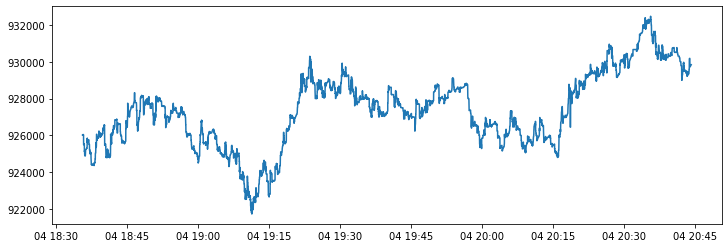

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

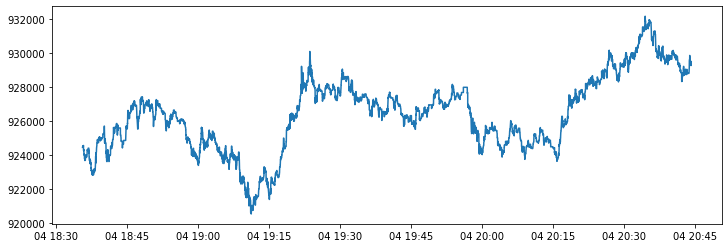

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-05-04 18:30:00,-1693,1247,925441,924195,924110,925804
2020-05-04 18:40:00,-1255,813,926759,925947,925832,927087
2020-05-04 18:50:00,-1365,1000,926853,925853,925788,927152
2020-05-04 19:00:00,-1398,956,925142,924186,924070,925468
2020-05-04 19:10:00,-1513,1076,924119,923043,922923,924436
2020-05-04 19:20:00,-1072,673,928519,927847,927734,928806
2020-05-04 19:30:00,-1024,600,928035,927435,927344,928367
2020-05-04 19:40:00,-1226,862,927589,926727,926620,927846
2020-05-04 19:50:00,-1322,906,927852,926946,926816,928138
